Processing frame  999 of 1000          

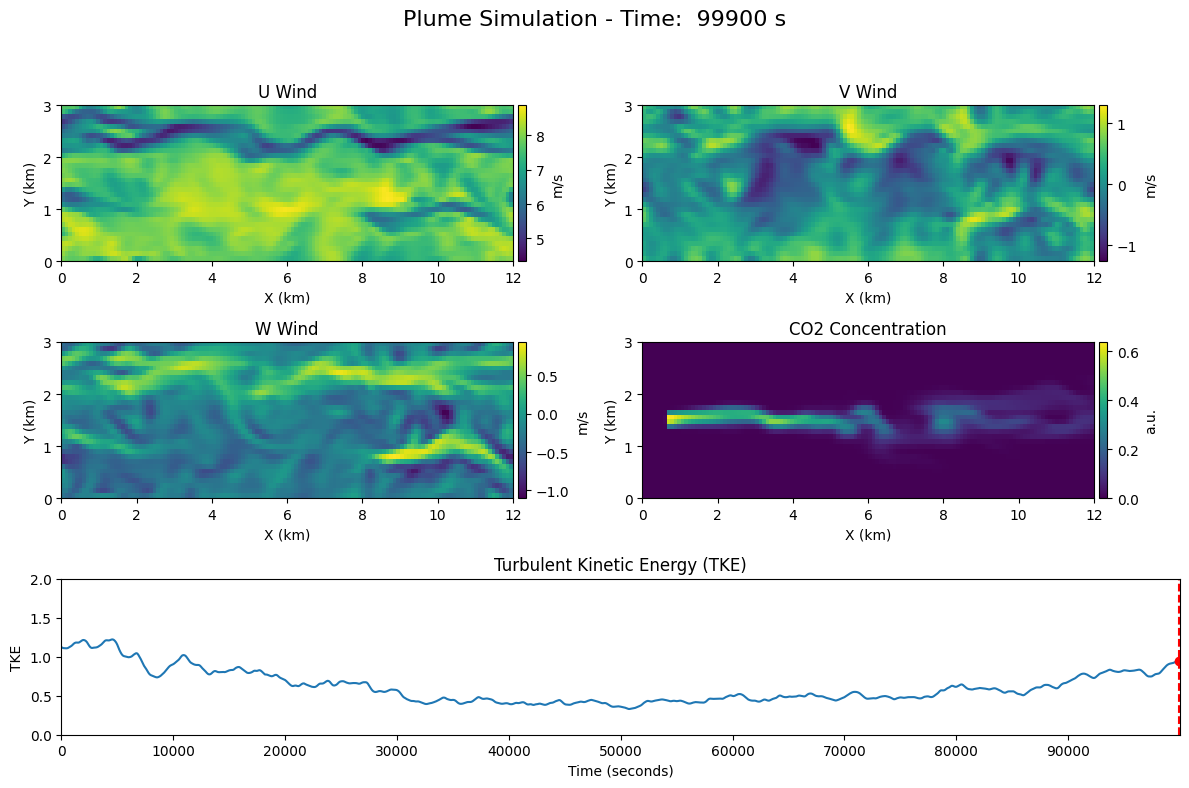

In [14]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import os

os.chdir("/Users/georg/Studium/Master/Thesis/env/microhh/cases/test/snaps_128_32_96_uflux6/npy_files")

# Load data from HDF5 file
with h5py.File('uvw_co2_128_32_96.h5', 'r') as f:
    u = f['u'][729:]
    v = f['v'][729:]
    w = f['w'][729:]
    co2 = f['co2'][729:]

# Calculate mean wind speeds over entire time period
u_mean = np.mean(u, axis=0)
v_mean = np.mean(v, axis=0)
w_mean = np.mean(w, axis=0)

# Calculate variations from mean
u_var = u - u_mean
v_var = v - v_mean
w_var = w - w_mean

# Calculate Turbulent Kinetic Energy (TKE) for each spatial location
tke = 0.5 * (np.mean(u_var**2 + v_var**2 + w_var**2, axis=(1, 2)))

# Create a figure with 5 subplots
fig = plt.figure(figsize=(12, 8))#, constrained_layout=True)
axs = fig.subplot_mosaic([[0, 1], 
                         [2, 3], 
                         [4, 4]])

fig.suptitle('Plume Simulation - Time: 0 s', fontsize=16)  # Set title for the entire figure

# Set x-axis and y-axis limits for the last subplot
axs[4].set_xlim(0, len(u))  # Set x-axis limit to 0-#timesteps
axs[4].set_ylim(0, 2)  # Set y-axis limit to 0-2

# Initialize plots
im_u = axs[0].imshow(u[0, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
axs[0].set_title('U Wind')  # Set title
axs[0].set_xlabel('X (km)')  # Set x-axis label
axs[0].set_ylabel('Y (km)')  # Set y-axis label
fig.colorbar(im_u, ax=axs[0], pad=0.01, label='m/s')

im_v = axs[1].imshow(v[0, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
axs[1].set_title('V Wind')  # Set title
axs[1].set_xlabel('X (km)')  # Set x-axis label
axs[1].set_ylabel('Y (km)')  # Set y-axis label
fig.colorbar(im_v, ax=axs[1], pad=0.01, label='m/s')

im_w = axs[2].imshow(w[0, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
axs[2].set_title('W Wind')  # Set title
axs[2].set_xlabel('X (km)')  # Set x-axis label
axs[2].set_ylabel('Y (km)')  # Set y-axis label
fig.colorbar(im_w, ax=axs[2], pad=0.01, label='m/s')

im_co2 = axs[3].imshow(co2[0, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
axs[3].set_title('CO2 Concentration')  # Set title
axs[3].set_xlabel('X (km)')  # Set x-axis label
axs[3].set_ylabel('Y (km)')  # Set y-axis label
fig.colorbar(im_co2, ax=axs[3], pad=0.01, label='a.u.')

line_tke, = axs[4].plot(tke)
axs[4].set_title('Turbulent Kinetic Energy (TKE)')  # Set title
axs[4].set_xlabel('Time (seconds)')  # Set x-axis label
axs[4].set_ylabel('TKE')  # Set y-axis label

# update x-ticks so that they are not in time steps but in seconds (100s per time step)
axs[4].set_xticks(np.arange(0, len(u), 100))
axs[4].set_xticklabels(np.arange(0, len(u)*100, 100*100))

# Tight layout to prevent overlap of subplots
plt.tight_layout(rect=[0, 0, 1, 0.95])

def update_plots(frame):
    print(f"\rProcessing frame {frame:4d} of 1000", end=' '*10)
    axs[0].cla()
    axs[1].cla()
    axs[2].cla()
    axs[3].cla()
    axs[4].cla()

    # Plot u, v, w, and co2 at the current time step, extent sets x,y axis limits to 0km-12km and 0km-3km
    im_u = axs[0].imshow(u[frame, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
    axs[0].set_title('U Wind')  # Set title
    axs[0].set_xlabel('X (km)')  # Set x-axis label
    axs[0].set_ylabel('Y (km)')  # Set y-axis label
    im_v = axs[1].imshow(v[frame, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
    axs[1].set_title('V Wind')  # Set title
    axs[1].set_xlabel('X (km)')  # Set x-axis label
    axs[1].set_ylabel('Y (km)')  # Set y-axis label
    im_w = axs[2].imshow(w[frame, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
    axs[2].set_title('W Wind')  # Set title
    axs[2].set_xlabel('X (km)')  # Set x-axis label
    axs[2].set_ylabel('Y (km)')  # Set y-axis label
    im_co2 = axs[3].imshow(co2[frame, :, :], cmap='viridis', aspect='auto', extent=[0, 12, 0, 3])
    axs[3].set_title('CO2 Concentration')  # Set title
    axs[3].set_xlabel('X (km)')  # Set x-axis label
    axs[3].set_ylabel('Y (km)')  # Set y-axis label

    axs[4].plot(tke)
    axs[4].plot(frame, tke[frame], 'o', color='red') # Plot the current TKE value in red
    axs[4].vlines(frame, 0, 3, color='red', linestyle='dashed') # Plot a dashed line from the x-axis to the TKE value
    # update x-ticks so that they are not in time steps but in seconds (100s per time step)
    axs[4].set_xticks(np.arange(0, len(u), 100))
    axs[4].set_xticklabels(np.arange(0, len(u)*100, 100*100))

    # Set x-axis and y-axis limits for the last subplot
    axs[4].set_xlim(0, len(u))  # Set x-axis limit to 0-#timesteps
    axs[4].set_ylim(0, 2)  # Set y-axis limit to 0-2
    axs[4].set_title('Turbulent Kinetic Energy (TKE)')  # Set title
    axs[4].set_xlabel('Time (seconds)')  # Set x-axis label
    axs[4].set_ylabel('TKE')  # Set y-axis label

    # Update the title with the current time frame
    fig.suptitle(f'Plume Simulation - Time: {frame*100:6d} s', fontsize=16)

    # Tight layout to prevent overlap of subplots
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    return im_u, im_v, im_w, im_co2


ani = animation.FuncAnimation(fig, update_plots, frames=1000, blit=False)

# Save animation as MP4
ani.save('plume_simulation.mp4', writer='ffmpeg', fps=10)

plt.show()
